#  Mini Project Part 1 & Part 2

I have chosen Banknote Authentication Dataset which can be reached via https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Forgery can be a big problem all over the world and maybe machine learning can help to solve this problem. The aim of this project is analyzing the data to classify the banknotes if they are real or fake according to some attributes which are extracted from banknotes' images. The attributes are variance of Wavelet Transformed image, skewness of Wavelet Transformed image, curtosis of Wavelet Transformed image, entropy of image which are continuous numbers and the target variable is "class". After EDA, I will apply a logistic regression model since this is a binary classification.   

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model
import seaborn as sns

In [151]:
#read the data
data=pd.read_csv("C:/Users/Cemil Turhan/Downloads/data_banknote_authentication.csv", names=[ "variance_image",  "skewness_image", "curtosis_image", "entropy_image","class"])

In [152]:
print(data.head())

   variance_image  skewness_image  curtosis_image  entropy_image  class
0         3.62160          8.6661         -2.8073       -0.44699      0
1         4.54590          8.1674         -2.4586       -1.46210      0
2         3.86600         -2.6383          1.9242        0.10645      0
3         3.45660          9.5228         -4.0112       -3.59440      0
4         0.32924         -4.4552          4.5718       -0.98880      0


In [153]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
variance_image    1372 non-null float64
skewness_image    1372 non-null float64
curtosis_image    1372 non-null float64
entropy_image     1372 non-null float64
class             1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB
None


In [154]:
print(data.describe())  # curtosis_image column has outlier which can be dropped

       variance_image  skewness_image  curtosis_image  entropy_image  \
count     1372.000000     1372.000000     1372.000000    1372.000000   
mean         0.433735        1.922353        1.397627      -1.191657   
std          2.842763        5.869047        4.310030       2.101013   
min         -7.042100      -13.773100       -5.286100      -8.548200   
25%         -1.773000       -1.708200       -1.574975      -2.413450   
50%          0.496180        2.319650        0.616630      -0.586650   
75%          2.821475        6.814625        3.179250       0.394810   
max          6.824800       12.951600       17.927400       2.449500   

             class  
count  1372.000000  
mean      0.444606  
std       0.497103  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       1.000000  
max       1.000000  


In [155]:
data.isna().sum() #there is not null values

variance_image    0
skewness_image    0
curtosis_image    0
entropy_image     0
class             0
dtype: int64

###  Some plots to see relationship between variables

Text(0.5, 1.0, 'curtosis_image')

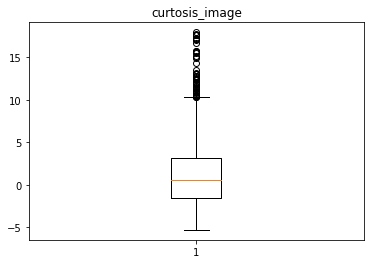

In [156]:
plt.boxplot(data.curtosis_image) #outliers
plt.title("curtosis_image")

Text(0.5, 1.0, 'variance_image')

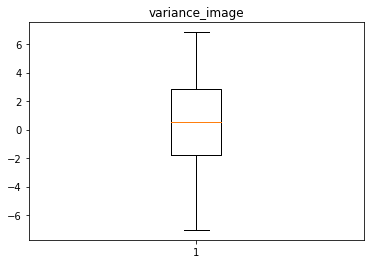

In [157]:
plt.boxplot(data.variance_image)
plt.title("variance_image")

Text(0.5, 1.0, 'skewness_image')

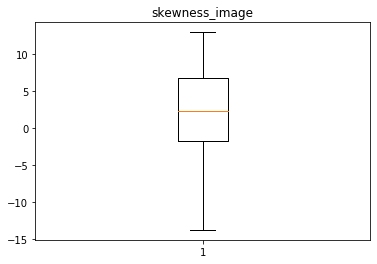

In [158]:
plt.boxplot(data.skewness_image)
plt.title("skewness_image")

Text(0.5, 1.0, 'entropy_image')

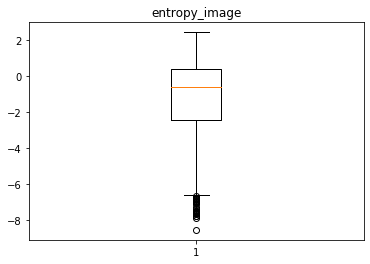

In [159]:
plt.boxplot(data.entropy_image) #outliers
plt.title("entropy_image")

Text(0.5, 1.0, 'entropy_image')

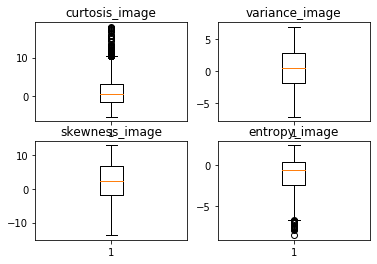

In [160]:
fig,axs=plt.subplots(2,2)
axs[0,0].boxplot(data.curtosis_image)
axs[0,0].set_title("curtosis_image")
axs[0,1].boxplot(data.variance_image)
axs[0,1].set_title("variance_image")
axs[1,0].boxplot(data.skewness_image)
axs[1,0].set_title("skewness_image")
axs[1,1].boxplot(data.entropy_image)
axs[1,1].set_title("entropy_image")

#### As seen above, boxplots are drawn for each variable. Lastly, I wanted to show all of them together to make a comment on them easily. Variables "curtosis_image" and "entropy_image" has many outliers but all 4 variables' medians are around 0. This can also be seen in histograms below. Histogram of "curtosis_image" is right skewed because its outliers above the maximum and histogram of "entropy_image" is left-skewed because its outliers below the minimum.  

Text(0.5, 1.0, 'curtosis_image')

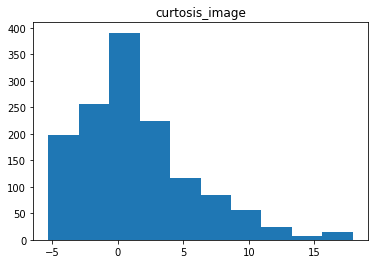

In [161]:
plt.hist(data.curtosis_image)
plt.title("curtosis_image")

Text(0.5, 1.0, 'variance_image')

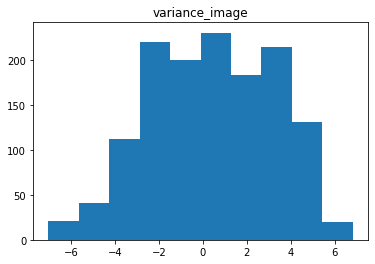

In [162]:
plt.hist(data.variance_image)
plt.title("variance_image")

Text(0.5, 1.0, 'skewness_image')

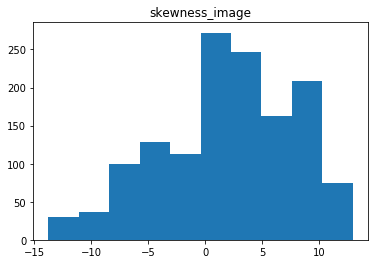

In [163]:
plt.hist(data.skewness_image)
plt.title("skewness_image")

Text(0.5, 1.0, 'entropy_image')

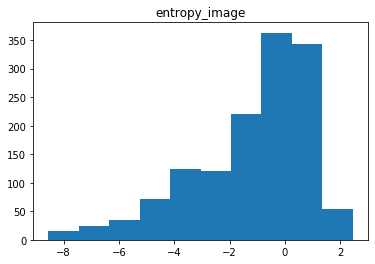

In [164]:
plt.hist(data.entropy_image)
plt.title("entropy_image")

C:\Users\Cemil Turhan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Cemil Turhan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


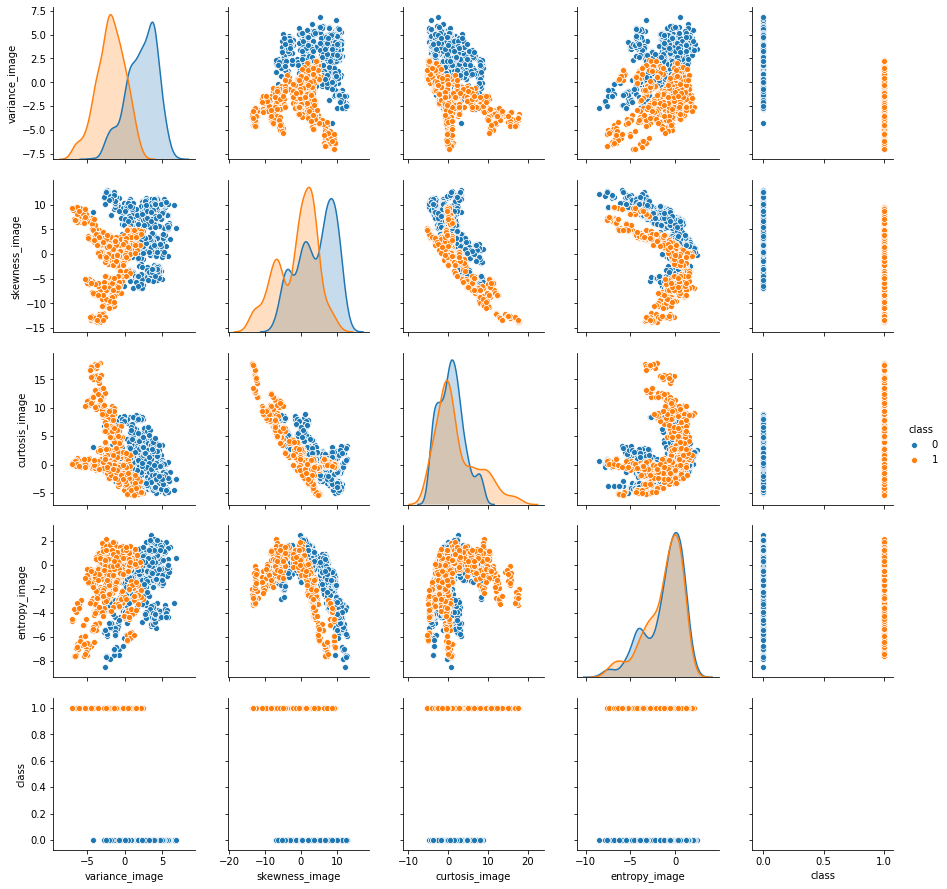

In [165]:
sns.pairplot(data, hue="class")

In [166]:
data.corr(method="pearson")  #Pearson Correlation

,variance_image,skewness_image,curtosis_image,entropy_image,class
variance_image,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness_image,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis_image,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy_image,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


#### As seen from Pearson correlations matrix, skewness of image and curtosis of image has the greatest correlation which is negative. Besides, I put the target variable to the function as well and it is seen that it is mostly correlated with the variance of image. Which means, variance of image has the biggest effect deciding the banknote's originality.

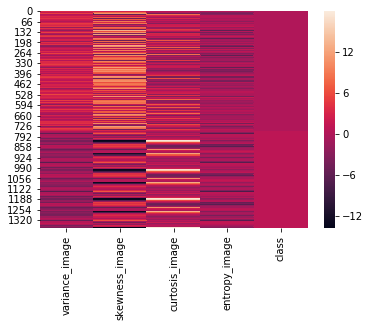

In [167]:
sns.heatmap(data)


### Model Fitting

In [170]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve


In [171]:
# split features and target variable
data_x = data.iloc[:,:-1].values
data_y = data.iloc[:, -1].values


In [172]:
data_x.shape


(1372, 4)

In [173]:
data_y.shape

(1372,)

In [174]:
#split the data into train and test parts
X_train, X_test, Y_train, Y_test= train_test_split(data_x,data_y, test_size=0.25, random_state=0) 

In [175]:
X_test.shape

(343, 4)

In [176]:
Y_train.shape

(1029,)

In [177]:
Y_test.shape

(343,)

In [178]:
X_train.shape

(1029, 4)

#### First, I apply logistic regression model to the data wiithout any scaling 

In [179]:
#model fitting
log_reg=LogisticRegression()
fit=log_reg.fit(X_train, Y_train)

C:\Users\Cemil Turhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [180]:
#predicting on test data
Y_pred=log_reg.predict(X_test)

In [181]:
Y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,

In [182]:
print(log_reg.score(X_test,Y_test)) #accuracy 

0.9854227405247813


In [183]:
conf_mat=confusion_matrix(Y_test,Y_pred)

In [184]:
print(conf_mat)

[[190   5]
 [  0 148]]


In [185]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       195
           1       0.97      1.00      0.98       148

    accuracy                           0.99       343
   macro avg       0.98      0.99      0.99       343
weighted avg       0.99      0.99      0.99       343



In [186]:
fpr, tpr, thresholds=roc_curve(Y_test,Y_pred)

In [187]:
roc_auc=metrics.auc(fpr,tpr)

In [188]:
print(roc_auc)

0.9871794871794871


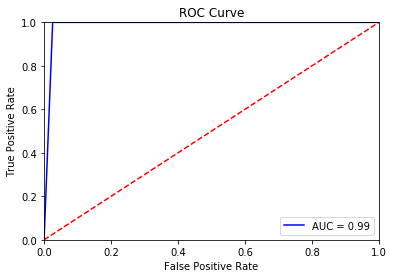

In [189]:
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Now, I standardize the data and then apply the model

In [190]:
#scale the data to get better results (there are outliers, etc.)
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.fit_transform(X_test)


In [191]:
#model fitting
log_reg=LogisticRegression()
fit=log_reg.fit(X_train_sc, Y_train)

C:\Users\Cemil Turhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [192]:
#predicting on test data
Y_pred_sc=log_reg.predict(X_test_sc)

In [193]:
print(log_reg.score(X_test_sc,Y_test)) #accuracy 

0.9795918367346939


In [194]:
conf_mat_sc=confusion_matrix(Y_test,Y_pred_sc)

In [195]:
print(conf_mat_sc)

[[188   7]
 [  0 148]]


In [196]:
print(classification_report(Y_test,Y_pred_sc))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       195
           1       0.95      1.00      0.98       148

    accuracy                           0.98       343
   macro avg       0.98      0.98      0.98       343
weighted avg       0.98      0.98      0.98       343



#### Scaling the features reduced accuracy from 0.985 to 0.979 and increased false predictions from 5 to 7. These are small changes but still, not scaling gives better results.

#### Reducing number of features
From the correlation matrix below, we can see that curtosis_image has the weakest relationship with target variable. So, I take it off and build a model.


In [197]:
data.corr(method="pearson")  #Pearson Correlation

,variance_image,skewness_image,curtosis_image,entropy_image,class
variance_image,1.000000,0.264026,-0.380850,0.276817,-0.724843
skewness_image,0.264026,1.000000,-0.786895,-0.526321,-0.444688
curtosis_image,-0.380850,-0.786895,1.000000,0.318841,0.155883
entropy_image,0.276817,-0.526321,0.318841,1.000000,-0.023424
class,-0.724843,-0.444688,0.155883,-0.023424,1.000000


In [198]:
data_toff=data.drop(columns=["curtosis_image"])

In [199]:
# split features and target variable
data_x_toff = data_toff.iloc[:,:-1].values
data_y_toff = data_toff.iloc[:, -1].values

In [200]:
#split the data into train and test parts
X_tr, X_ts, Y_tr, Y_ts= train_test_split(data_x_toff,data_y_toff, test_size=0.25, random_state=0) 

In [201]:
#model fitting
log_reg=LogisticRegression()
fit=log_reg.fit(X_tr, Y_tr)

C:\Users\Cemil Turhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [202]:
#predicting on test data
Y_pr=log_reg.predict(X_ts)

In [203]:
print(log_reg.score(X_ts,Y_ts)) #accuracy 

0.8571428571428571


In [204]:
conf_mat_sc=confusion_matrix(Y_ts,Y_pr)

In [205]:
print(conf_mat_sc)

[[169  26]
 [ 23 125]]


In [206]:
print(classification_report(Y_ts,Y_pr))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       195
           1       0.83      0.84      0.84       148

    accuracy                           0.86       343
   macro avg       0.85      0.86      0.85       343
weighted avg       0.86      0.86      0.86       343



#### When curtosis_image feature is taken off, the model worked very poor. Accuracy dropped to 0.85 and misclassifications increased from 5 to 49. Precision and recall also worsened. An important reason for this can be small number of features we have. Since there are only 4 features except target variable, each one has a considerable effect on linear model. 

#### Model on only 2 strongest features
I apply classification model using only variance_image and skewness_image features.

In [207]:
data_most_2=data.drop(columns=["curtosis_image", "entropy_image"])

In [208]:
# split features and target variable
data_x_m2 = data_most_2.iloc[:,:-1].values
data_y_m2 = data_most_2.iloc[:, -1].values

In [209]:
#split the data into train and test parts
X_trm, X_tsm, Y_trm, Y_tsm= train_test_split(data_x_m2, data_y_m2, test_size=0.25, random_state=0) 

In [210]:
#model fitting
log_reg=LogisticRegression()
fit=log_reg.fit(X_trm, Y_trm)

C:\Users\Cemil Turhan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [211]:
#predicting on test data
Y_prm=log_reg.predict(X_tsm)

In [212]:
print(log_reg.score(X_tsm,Y_tsm)) #accuracy 

0.8775510204081632


In [213]:
conf_mat2=confusion_matrix(Y_tsm,Y_prm)

In [214]:
print(conf_mat2)  # There are many false predictions 

[[175  20]
 [ 22 126]]


In [215]:
print(classification_report(Y_tsm,Y_prm))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       195
           1       0.86      0.85      0.86       148

    accuracy                           0.88       343
   macro avg       0.88      0.87      0.88       343
weighted avg       0.88      0.88      0.88       343



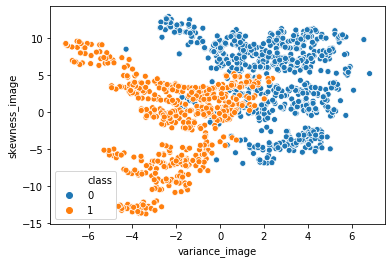

In [216]:
 ax = sns.scatterplot(x="variance_image", y="skewness_image", hue="class", data=data_most_2)

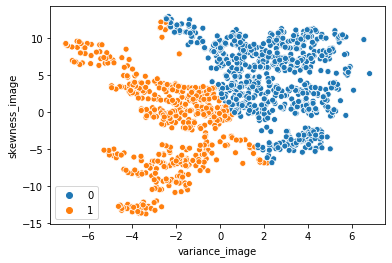

In [217]:
 ax = sns.scatterplot(x="variance_image", y="skewness_image", hue=log_reg.predict(data_x_m2), data=data_most_2)

In [218]:
fpr, tpr, thresholds=roc_curve(Y_tsm,Y_prm)

In [219]:
fpr

array([0.       , 0.1025641, 1.       ])

In [220]:
tpr

array([0.        , 0.85135135, 1.        ])

In [221]:
thresholds

array([2, 1, 0], dtype=int64)

In [222]:
roc_auc=metrics.auc(fpr,tpr)

In [223]:
print(roc_auc)

0.8743936243936243


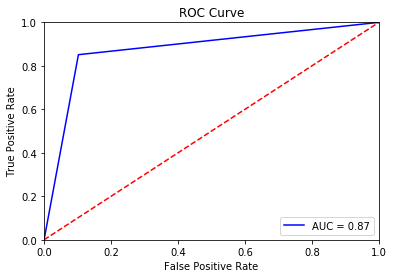

In [224]:
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


 #### Two scatterplots above show the relationship of two most strongest features. First one is labelled based on the actual classes and the second one is labelled based on the predicted classes. As it can be seen, some data points in the middle are not predicted correctly. Using only 2 variables worsened the model and increased the misclassifications. AUC can also be seen from ROC curve and it is less than the very first model.
#### Overall, after analyzing and preparing this dataset, a logistic regression model is built to classify the banknotes as real or fake. The model gives successful results with high accuracy, precision and recall rates. Since number of features is low (4), all features has a great importance on the model. If we take even the weakest one off, the model got worse. 